<a href="https://colab.research.google.com/github/Chm-vinicius/coolab_tensorflow_study/blob/master/machine_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## baixando conjunto de dados
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## normalizando matrix
train_images, test_images = train_images/255.0, test_images/255.0

170500096/170498071 [==============================] - 4s 0us/step


<function matplotlib.pyplot.show>

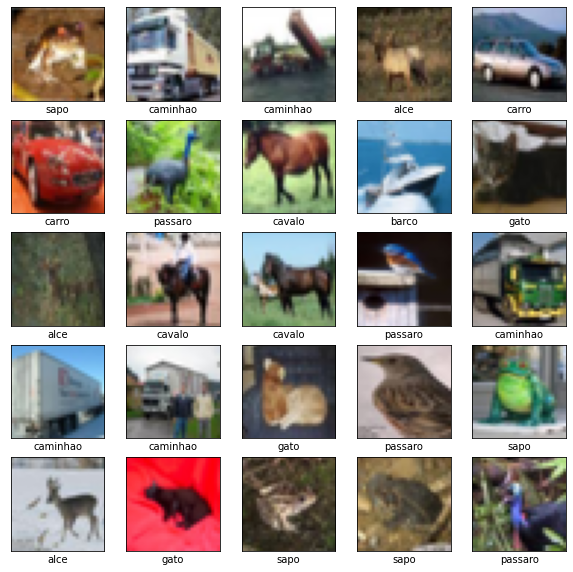

In [3]:
## checando conjunto de dados e criando nomes associativos
class_names = ['aviao','carro','passaro','gato','alce','elementox','sapo','cavalo','barco','caminhao']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show

In [23]:
## criando modelo convolucional

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [24]:
## achatamento dimensional da saida e adição de camadas densas ao modelo

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

## aqui uma camada adicional ao treinamento para fins de estudo

# model.add(layers.Dense(64, activation='relu'))

## continuando...

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [25]:
## compilando modelo

model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 44ms/step - loss: 2.1340 - accuracy: 0.3175 - val_loss: 2.0536 - val_accuracy: 0.4027
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.0236 - accuracy: 0.4337 - val_loss: 2.0224 - val_accuracy: 0.4360
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.9690 - accuracy: 0.4891 - val_loss: 1.9470 - val_accuracy: 0.5096
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.9392 - accuracy: 0.5191 - val_loss: 1.9455 - val_accuracy: 0.5104
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.9102 - accuracy: 0.5486 - val_loss: 1.9189 - val_accuracy: 0.5399
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8888 - accuracy: 0.5696 - val_loss: 1.9046 - val_accuracy: 0.5550
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.8594 - accuracy: 0.5989 - val_loss: 1.8733 -

313/313 - 4s - loss: 1.8394 - accuracy: 0.6189


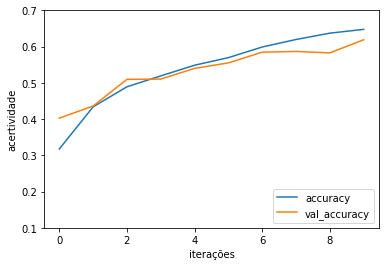

In [26]:
## avaliando a cagada

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('iterações')
plt.ylabel('acertividade')
plt.ylim([0.1,0.7])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Pelo que parece ao adicionar uma nova camada densa, a carga computacional aumenta bastante e a perda ultrapassa a unidade, consequentemente a acertividade é reduzida.

certin sapo


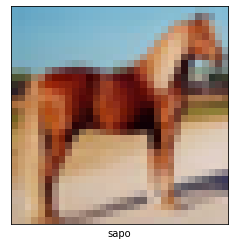

In [41]:
import numpy as np

prediction = model.predict(test_images)

def prof(key: int):
  pred = np.argmax(prediction[key])

  if test_labels[key] == pred:
    print("certin "+class_names[pred])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[key], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred])

prof(43)